# Notebook de pruebas con scikitLearn

Ejemplo regresion lineal

In [138]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


In [67]:
diabetes_ = datasets.load_diabetes(return_X_y=True)
diabetes_[0].shape
# diabetes_[1].shape

(442, 10)

In [78]:
np.newaxis # para añadir una nueva dimension

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


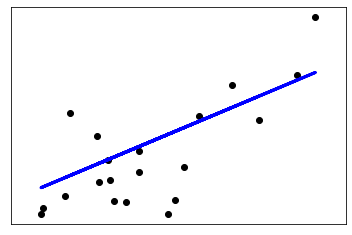

In [126]:


# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True) # X sos los datos recogidos e Y son los resultados

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred)) 

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## pruebas regresion lineal simple

In [88]:
ds = pd.read_excel('EstructuraFinalSinVacios.xlsx').reset_index()
ds.head()

,index,Unnamed: 0,Latitud,Longitud,Fecha,Avistamientos,Profundidad,Coord,mlotst,zos,bottomT,thetao,so,uo,vo
0,0,381,-42.666667,-74.083333,2015-05-27,1,0.494025,"[-42.66666666666666, -74.16666666666666]",49.592583,0.106815,12.775384,12.781243,33.344524,0.034791,-0.079958
1,1,382,-42.666667,-74.083333,2015-05-27,1,5.078224,"[-42.66666666666666, -74.16666666666666]",49.592583,0.106815,12.775384,12.780511,33.344524,0.028687,-0.051881
2,2,383,-42.666667,-74.083333,2015-05-27,1,9.572997,"[-42.66666666666666, -74.16666666666666]",49.592583,0.106815,12.775384,12.780511,33.344524,0.023804,-0.039064
3,3,21,-41.833333,-73.833333,2014-06-04,1,0.494025,"[-41.83333333333333, -73.83333333333333]",11.139256,0.058901,11.645955,11.601275,33.599354,0.113529,0.039064
4,4,22,-41.833333,-73.833333,2014-06-04,1,5.078224,"[-41.83333333333333, -73.83333333333333]",11.139256,0.058901,11.645955,11.628376,33.623768,0.107425,0.034181


In [157]:
resultados = ds[['Avistamientos']] #separo las columnas del dataframe
datos = ds[['bottomT']]

In [158]:
resultados_ = np.array(resultados)
datos_ = np.array(datos)

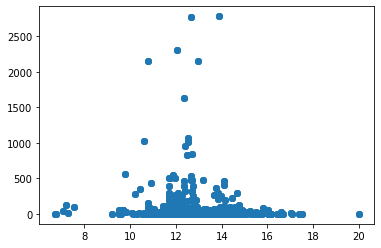

In [159]:
plt.scatter(datos_,resultados_)

In [160]:
# separo los datos en dos para entrnamiento y test
X_train,X_test,Y_train,Y_test = train_test_split(datos_,resultados_,test_size=0.2)
# algoritmo a utilizar
lr = linear_model.LinearRegression()
# se entrena al modelo
lr.fit(X_train,Y_train)
# prediccion
Y_pred = lr.predict(X_test)

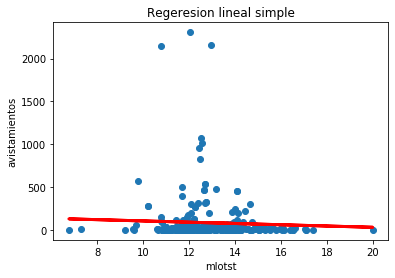

Coefficients: 
 [[-7.43153622]]
[180.23630225]
Mean squared error: 64045.79
Coefficient of determination: 0.00
[220] [72.81435393]
[59] [82.29637773]
[15] [94.02644662]
[1] [86.28078863]
[16] [75.68291036]
[22] [93.90669309]
[26] [96.67183215]
[215] [77.30497984]
[6] [109.18571713]
[6] [72.05774585]
[27] [92.34994694]
[9] [90.13456705]
[130] [89.36708001]
[1] [92.40437714]
[5] [97.90199003]
[2] [74.57794193]
[1] [98.88721203]
[3] [76.57015092]
[27] [87.32044082]
[7] [95.82814283]
[12] [90.64078206]
[25] [82.44878937]
[6] [82.07865694]
[14] [80.54366869]
[6] [79.83606196]
[15] [90.23254141]
[322] [85.69292833]
[70] [77.4900496]
[1] [70.6969484]
[5] [89.93316824]
[23] [77.66422623]
[6] [82.66107422]
[1] [76.65723923]
[1] [99.87242695]
[50] [77.04370781]
[10] [90.23254141]
[1] [78.99236555]
[1] [91.84916787]
[31] [75.79177075]
[8] [67.09900608]
[1] [95.75737649]
[35] [89.54669966]
[20] [83.45033334]
[322] [85.69292833]
[10] [101.51082548]
[10] [98.75657247]
[9] [91.58245281]
[3] [77.27231

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [161]:
# imprimir resultados
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,color='red' , linewidth = 3)
plt.title('Regeresion lineal simple')
plt.xlabel('mlotst')
plt.ylabel('avistamientos')
plt.show()
# The coefficients //pendiente
print('Coefficients: \n', lr.coef_)
print(lr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred)) 

# datos que teniamos y los uqe hemos obtenido
[print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]

## pruebas regresion lineal multiple

In [163]:
ds = pd.read_excel('EstructuraFinalSinVacios.xlsx').reset_index()
ds.head()

,index,Unnamed: 0,Latitud,Longitud,Fecha,Avistamientos,Profundidad,Coord,mlotst,zos,bottomT,thetao,so,uo,vo
0,0,381,-42.666667,-74.083333,2015-05-27,1,0.494025,"[-42.66666666666666, -74.16666666666666]",49.592583,0.106815,12.775384,12.781243,33.344524,0.034791,-0.079958
1,1,382,-42.666667,-74.083333,2015-05-27,1,5.078224,"[-42.66666666666666, -74.16666666666666]",49.592583,0.106815,12.775384,12.780511,33.344524,0.028687,-0.051881
2,2,383,-42.666667,-74.083333,2015-05-27,1,9.572997,"[-42.66666666666666, -74.16666666666666]",49.592583,0.106815,12.775384,12.780511,33.344524,0.023804,-0.039064
3,3,21,-41.833333,-73.833333,2014-06-04,1,0.494025,"[-41.83333333333333, -73.83333333333333]",11.139256,0.058901,11.645955,11.601275,33.599354,0.113529,0.039064
4,4,22,-41.833333,-73.833333,2014-06-04,1,5.078224,"[-41.83333333333333, -73.83333333333333]",11.139256,0.058901,11.645955,11.628376,33.623768,0.107425,0.034181


In [174]:
resultados = ds[['Avistamientos']] #separo las columnas del dataframe
datos = ds[['mlotst','zos','bottomT','thetao','so','uo','vo']]
print(datos)

         mlotst       zos    bottomT     thetao         so        uo        vo
0     49.592583  0.106815  12.775384  12.781243  33.344524  0.034791 -0.079958
1     49.592583  0.106815  12.775384  12.780511  33.344524  0.028687 -0.051881
2     49.592583  0.106815  12.775384  12.780511  33.344524  0.023804 -0.039064
3     11.139256  0.058901  11.645955  11.601275  33.599354  0.113529  0.039064
4     11.139256  0.058901  11.645955  11.628376  33.623768  0.107425  0.034181
...         ...       ...        ...        ...        ...       ...       ...
1564  10.528886  0.036012  14.238075  15.194647  34.762108 -0.030519  0.079958
1565  10.528886  0.036012  14.238075  14.896542  34.766685 -0.021363  0.040895
1566  14.496293  0.054628  15.651692  15.679525  34.858242 -0.117801  0.175787
1567  14.496293  0.054628  15.651692  15.642902  34.858242 -0.115360  0.151372
1568  14.496293  0.054628  15.651692  15.627522  34.858242 -0.095828  0.176397

[1569 rows x 7 columns]


In [175]:
resultados_ = np.array(resultados)
datos_ = np.array(datos)
print(datos_)

[[ 4.95925827e+01  1.06814787e-01  1.27753839e+01 ...  3.33445244e+01
   3.47911008e-02 -7.99584985e-02]
 [ 4.95925827e+01  1.06814787e-01  1.27753839e+01 ...  3.33445244e+01
   2.86873989e-02 -5.18814661e-02]
 [ 4.95925827e+01  1.06814787e-01  1.27753839e+01 ...  3.33445244e+01
   2.38044374e-02 -3.90636921e-02]
 ...
 [ 1.44962931e+01  5.46281338e-02  1.56516924e+01 ...  3.48582420e+01
  -1.17801443e-01  1.75786614e-01]
 [ 1.44962931e+01  5.46281338e-02  1.56516924e+01 ...  3.48582420e+01
  -1.15359962e-01  1.51371807e-01]
 [ 1.44962931e+01  5.46281338e-02  1.56516924e+01 ...  3.48582420e+01
  -9.58281159e-02  1.76396981e-01]]


In [176]:
# separo los datos en dos para entrnamiento y test
X_train,X_test,Y_train,Y_test = train_test_split(datos_,resultados_,test_size=0.2)
# algoritmo a utilizar
lr = linear_model.LinearRegression()
# se entrena al modelo
lr.fit(X_train,Y_train)
# prediccion
Y_pred = lr.predict(X_test)

In [178]:
# The coefficients //pendiente
print('Coefficients: \n', lr.coef_)
print(lr.intercept_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred)) 

# datos que teniamos y los uqe hemos obtenido
# [print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]

Coefficients: 
 [[  -1.24544401 1076.67175233   -2.46993725  -53.81218664   18.07815637
   178.50510169  -94.80164694]]
[224.76490636]
Mean squared error: 103825.15
Coefficient of determination: 0.08


## Regresion polinomial

In [190]:
from sklearn.model_selection import train_test_split

In [220]:
resultados = ds[['Avistamientos']] #separo las columnas del dataframe
# datos = ds[['mlotst']]
datos = ds[['mlotst','zos','bottomT','thetao','so','uo','vo']]
print(datos)

         mlotst       zos    bottomT     thetao         so        uo        vo
0     49.592583  0.106815  12.775384  12.781243  33.344524  0.034791 -0.079958
1     49.592583  0.106815  12.775384  12.780511  33.344524  0.028687 -0.051881
2     49.592583  0.106815  12.775384  12.780511  33.344524  0.023804 -0.039064
3     11.139256  0.058901  11.645955  11.601275  33.599354  0.113529  0.039064
4     11.139256  0.058901  11.645955  11.628376  33.623768  0.107425  0.034181
...         ...       ...        ...        ...        ...       ...       ...
1564  10.528886  0.036012  14.238075  15.194647  34.762108 -0.030519  0.079958
1565  10.528886  0.036012  14.238075  14.896542  34.766685 -0.021363  0.040895
1566  14.496293  0.054628  15.651692  15.679525  34.858242 -0.117801  0.175787
1567  14.496293  0.054628  15.651692  15.642902  34.858242 -0.115360  0.151372
1568  14.496293  0.054628  15.651692  15.627522  34.858242 -0.095828  0.176397

[1569 rows x 7 columns]


In [221]:
resultados_ = np.array(resultados)
datos_ = np.array(datos)
print(datos_)

[[ 4.95925827e+01  1.06814787e-01  1.27753839e+01 ...  3.33445244e+01
   3.47911008e-02 -7.99584985e-02]
 [ 4.95925827e+01  1.06814787e-01  1.27753839e+01 ...  3.33445244e+01
   2.86873989e-02 -5.18814661e-02]
 [ 4.95925827e+01  1.06814787e-01  1.27753839e+01 ...  3.33445244e+01
   2.38044374e-02 -3.90636921e-02]
 ...
 [ 1.44962931e+01  5.46281338e-02  1.56516924e+01 ...  3.48582420e+01
  -1.17801443e-01  1.75786614e-01]
 [ 1.44962931e+01  5.46281338e-02  1.56516924e+01 ...  3.48582420e+01
  -1.15359962e-01  1.51371807e-01]
 [ 1.44962931e+01  5.46281338e-02  1.56516924e+01 ...  3.48582420e+01
  -9.58281159e-02  1.76396981e-01]]


In [222]:
X_train_p,X_test_p,Y_train_p,Y_test_p = train_test_split(datos_,resultados_,test_size=0.2)

In [223]:
from sklearn.preprocessing import PolynomialFeatures

In [224]:
poli_reg = PolynomialFeatures(degree = 10) ## grado del polinomio

# se transforma la caracteristica actual a una de un grado mayor, lo definifo encima
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

pr = linear_model.LinearRegression()
pr.fit(X_train_poli,Y_train_p)
Y_pred_pr = pr.predict(X_test_poli)


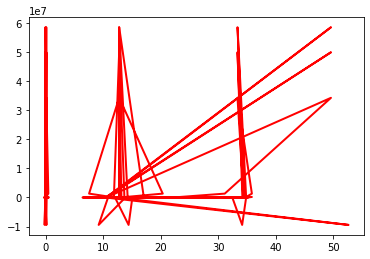

In [226]:
# plt.scatter(X_test_p,Y_test_p)
plt.plot(X_test_p,Y_pred_pr,color='red', linewidth = 2)
plt.show()

In [227]:
print(pr.coef_)
print(pr.intercept_)
print(pr.score(X_train_poli,Y_train_p))

[[ 5.18955729e-07  4.60368619e-11  5.73332026e-12 ...  1.47896253e-16
   3.44276250e-16 -2.30188478e-15]]
[112092.9889728]
0.8975300747512062


In [229]:
# [print(Y_test[i],Y_pred[i]) for i in range(len(Y_pred))]